In [10]:
import numpy as np
import cv2

# Create a black background
test_img = np.zeros((300, 400), dtype=np.uint8)

# Object 1: Gray circle
cv2.circle(test_img, (80, 100), 30, 150, -1)  # center, radius, color, fill

# Object 2: Bright rectangle
cv2.rectangle(test_img, (180, 70), (240, 130), 220, -1)

# Object 3: Medium-dark ellipse
cv2.ellipse(test_img, (300, 80), (30, 20), 0, 0, 360, 100, -1)

# Object 4: Brighter ellipse (tilted)
cv2.ellipse(test_img, (100, 220), (40, 25), 30, 0, 360, 200, -1)

# Object 5: Square
cv2.rectangle(test_img, (260, 200), (310, 250), 180, -1)

# Object 6: Circle (darker)
cv2.circle(test_img, (340, 270), 20, 90, -1)

# Save image
cv2.imwrite("test_shapes_complex.png", test_img)

# Optional: Show image
cv2.imshow("Synthetic Test Image", test_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


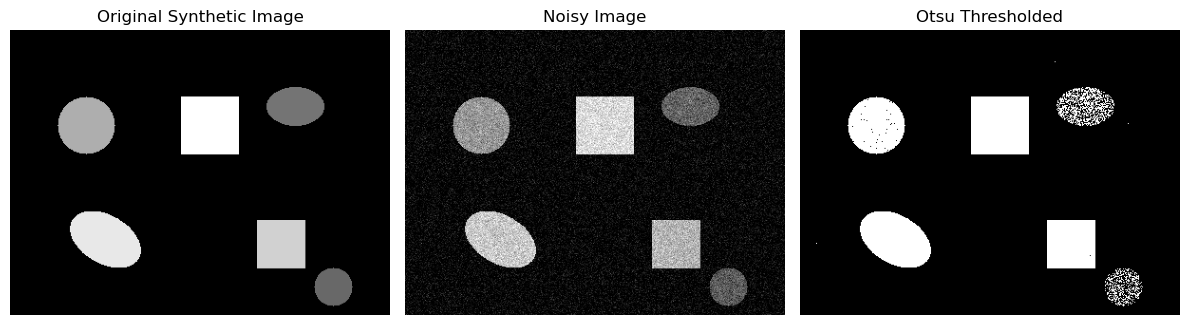

Images saved: 'otsu_noisy_input.png' and 'otsu_result_output.png'


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


image = cv2.imread("test_shapes_complex.png", 0)

if image is None:
    print("Image not found. Check filename.")
    exit()


def add_gaussian_noise(img, mean=0, sigma=25):
    noise = np.random.normal(mean, sigma, img.shape)
    noisy_img = img + noise
    noisy_img = np.clip(noisy_img, 0, 255)  # Keep in [0, 255]
    return noisy_img.astype(np.uint8)

noisy_image = add_gaussian_noise(image)


def otsu_threshold(img):
    if img.dtype != np.uint8:
        img = img.astype(np.uint8)
    _, otsu_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return otsu_img

otsu_result = otsu_threshold(noisy_image)


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Synthetic Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Otsu Thresholded")
plt.imshow(otsu_result, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


cv2.imwrite("otsu_noisy_input.png", noisy_image)
cv2.imwrite("otsu_result_output.png", otsu_result)
print("Images saved: 'otsu_noisy_input.png' and 'otsu_result_output.png'")


Seed at (120,130) - Intensity: 0


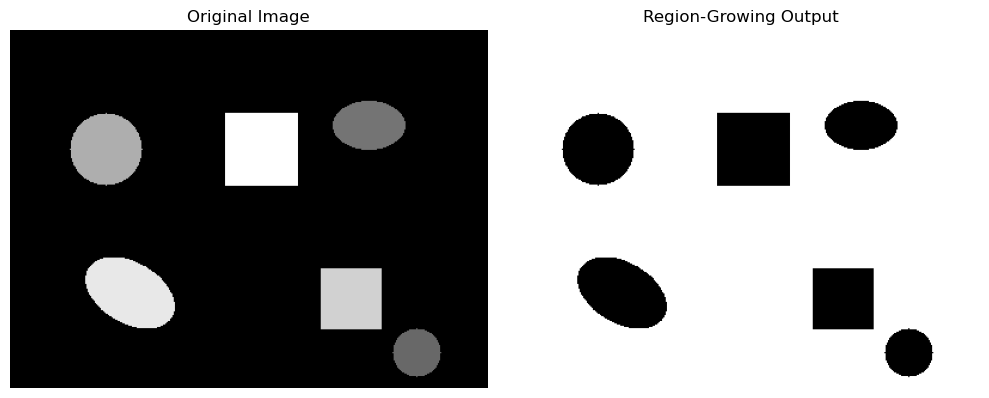

Result saved as 'region_growing_result.png'


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Function: Region Growing
# ---------------------------
def region_growing(image, seed_points, threshold=15):
    rows, cols = image.shape
    visited = np.zeros_like(image, dtype=bool)
    result = np.zeros_like(image, dtype=np.uint8)

    for seed in seed_points:
        x, y = seed
        region_value = image[x, y]
        print(f"Seed at ({x},{y}) - Intensity: {region_value}")

        stack = [(x, y)]
        visited[x, y] = True

        while stack:
            i, j = stack.pop()
            result[i, j] = 255

            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                ni, nj = i + dx, j + dy
                if 0 <= ni < rows and 0 <= nj < cols and not visited[ni, nj]:
                    if abs(int(image[ni, nj]) - int(region_value)) <= threshold:
                        visited[ni, nj] = True
                        stack.append((ni, nj))
    return result

# ---------------------------
# Load Image (Grayscale)
# ---------------------------
image = cv2.imread('test_shapes_complex.png', 0)  # <-- Replace with your filename if different

if image is None:
    print("Image not found. Check the path!")
    exit()

# ---------------------------
# Seed point & Threshold
# ---------------------------
seed_points = [(120, 130)]  # You can change this manually
threshold = 25  # Try 20–40 depending on contrast

# ---------------------------
# Run Region Growing
# ---------------------------
segmented = region_growing(image, seed_points, threshold=threshold)

# ---------------------------
# Display Original + Result
# ---------------------------
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Region-Growing Output")
plt.imshow(segmented, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# ---------------------------
# Save the output
# ---------------------------
cv2.imwrite("region_growing_result.png", segmented)
print("Result saved as 'region_growing_result.png'")
